# Esercitazione 11

**6 Maggio 2025**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p  #aggiornamento della soluzione nella direzione opposta a quella del gradiente: alpha mi dice dove fermarmi 
        #nella direzione del gradiente affinche F(xk+t p ) <F(xk)
        
         
        vec_sol.append(x.copy())
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r #Direzione opposta alla direzione del gradiente
        
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it
    

In [3]:
def steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol):
#solo per matrici di dimensioni 2
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'r-o')
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
        
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha*p
       
        
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r 
        
    plt.show()
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [4]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha *p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p  #La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        #sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
   
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

In [5]:
def conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol):
#solo per matrici di dimensioni 2
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'r-o')
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
        
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha*p
       
        
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p  #La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        #sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
   
        
    plt.show()
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi l'errore ad ogni iterazione.

In [6]:
def f(x,A,b):
    Ax = A@x
    xAx = x.T@Ax
    bx = b.T@x
    return 0.5 * xAx - bx



/tmp/ipykernel_3345/3077236046.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)


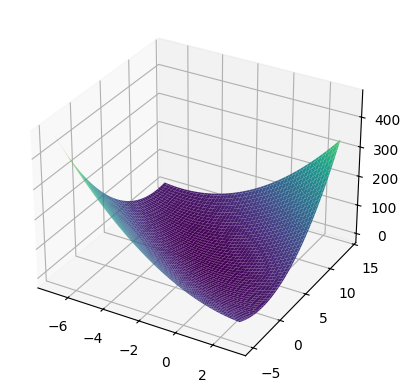

In [7]:
A=np.array([[8,4],[4,3]]) 
b=np.array([[8],[10]])
x=np.linspace(-7,3,100)
y=np.linspace(-5,14,100)
 
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show() 


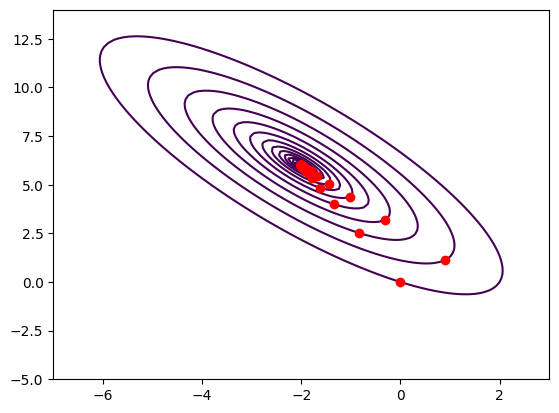

83


In [8]:
x0=np.zeros_like(b)
itmax=200
tol=1e-10
x_G_0,vet_r_G_0,vec_sol_G,itG_0=steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)
print(itG_0)


Soluzione sistema  [[-2.]
 [ 6.]]
Numero di iterati  83


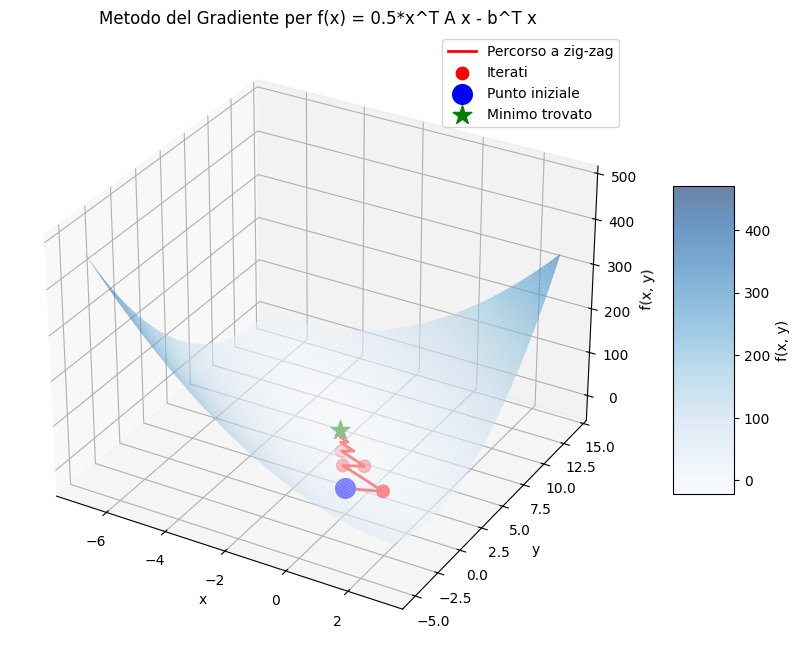

cond A 10.246950765959598


In [9]:
print("Soluzione sistema ", x_G_0)
print("Numero di iterati ", itG_0)
# Visualizzazione grafica 3D
# Creazione della griglia per la superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie

surf = ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6, rstride=1, cstride=1, linewidth=0)

# Calcolo di z_iterates
z_iterates = np.array([f(vec_sol_G[i, :].reshape(2, 1), A, b) for i in range(vec_sol_G.shape[0])])

# Plot del percorso degli iterati
ax.plot(vec_sol_G[:, 0], vec_sol_G[:, 1], z_iterates.flatten(), color='red', linewidth=2, label='Percorso a zig-zag')
ax.scatter(vec_sol_G[:5, 0], vec_sol_G[:5, 1], z_iterates[:5].flatten(), color='red', s=80, label='Iterati')

# Punto iniziale e minimo

ax.scatter([x0[0, 0]], [x0[1, 0]], [f(x0, A, b)], color='blue', s=200, marker='o', label='Punto iniziale')
ax.scatter([x_G_0[0, 0]], [x_G_0[1, 0]], f(x_G_0,A,b), color='green', s=200, marker='*', label='Minimo trovato')

# Personalizzazione
ax.set_title(f'Metodo del Gradiente per f(x) = 0.5*x^T A x - b^T x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')
plt.show()
print("cond A",np.linalg.norm(A))

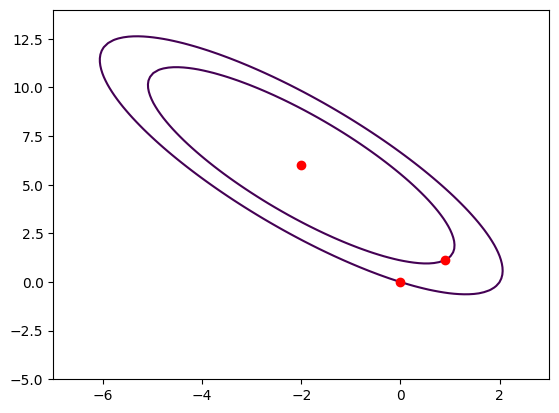

2


In [10]:
x0=np.zeros_like(b)
itmax=200
tol=1e-10
x_cg_0,vet_r_cg_0,vec_sol_cg,itcg_0=conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol)
print(itcg_0)

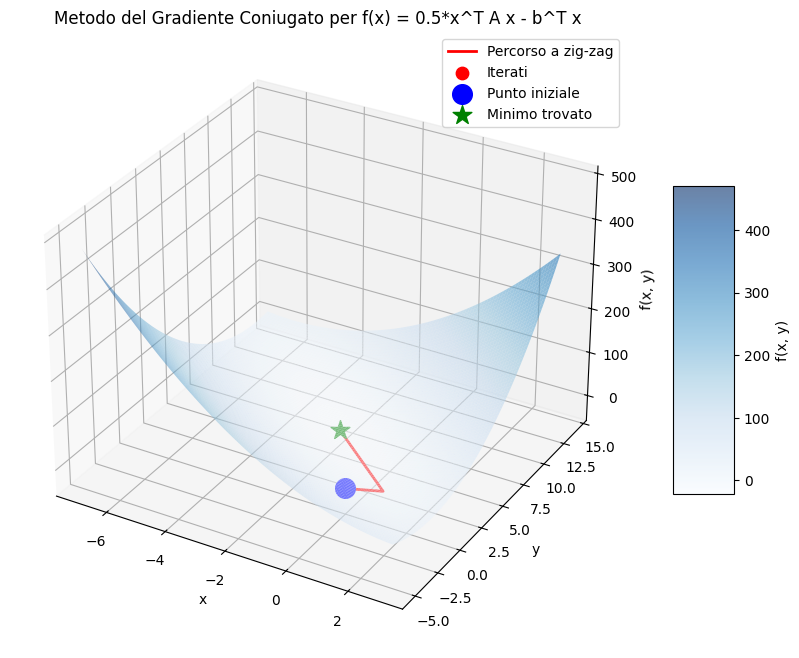

cond A 10.246950765959598


In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot della superficie

surf = ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6, rstride=1, cstride=1, linewidth=0)

# Calcolo di z_iterates
z_iterates = np.array([f(vec_sol_cg[i, :].reshape(2, 1), A, b) for i in range(vec_sol_cg.shape[0])])

# Plot del percorso degli iterati
ax.plot(vec_sol_cg[:, 0], vec_sol_cg[:, 1], z_iterates.flatten(), color='red', linewidth=2, label='Percorso a zig-zag')
ax.scatter(vec_sol_G[:1, 0], vec_sol_G[:1, 1], z_iterates[:1].flatten(), color='red', s=80, label='Iterati')

# Punto iniziale e minimo

ax.scatter([x0[0, 0]], [x0[1, 0]], [f(x0, A, b)], color='blue', s=200, marker='o', label='Punto iniziale')
ax.scatter([x_cg_0[0, 0]], [x_cg_0[1, 0]], f(x_cg_0,A,b), color='green', s=200, marker='*', label='Minimo trovato')

# Personalizzazione
ax.set_title(f'Metodo del Gradiente Coniugato per f(x) = 0.5*x^T A x - b^T x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')
plt.show()
print("cond A",np.linalg.norm(A))

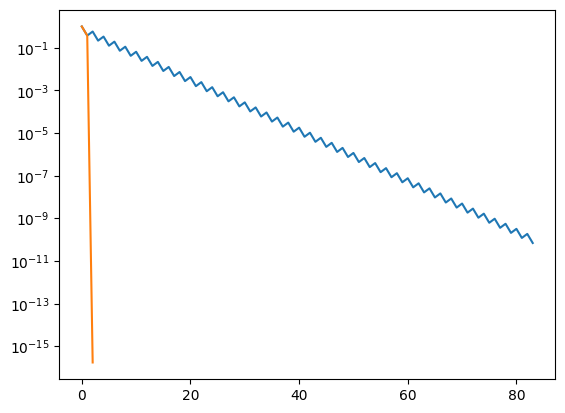

In [12]:
plt.semilogy(np.arange(itG_0+1),vet_r_G_0,np.arange(itcg_0+1),vet_r_cg_0)

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [13]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

In [14]:
n=10
A=creaPoisson(n)
print("Condizionameto di A", np.linalg.cond(A))
b=np.sum(A,axis=1).reshape(n,1)
toll=1e-8
it_max=10000
n=A.shape[0]
x0=np.zeros_like(b)
 

Condizionameto di A 11.917666569787297


In [15]:
x_gr,vet_r_gr,vec_sol_gr,itG=steepestdescent(A,b,x0,it_max,toll)
print("Iterazioni Gradiente ",itG)

Iterazioni Gradiente  85


In [16]:
x_cg,vet_r_cg,vec_sol_cg,itCG=conjugate_gradient(A,b,x0,it_max,toll)
print("Iterazioni Gradiente Coniugato ",itCG)

Iterazioni Gradiente Coniugato  5


Condizionamento di A 11.917666569787297


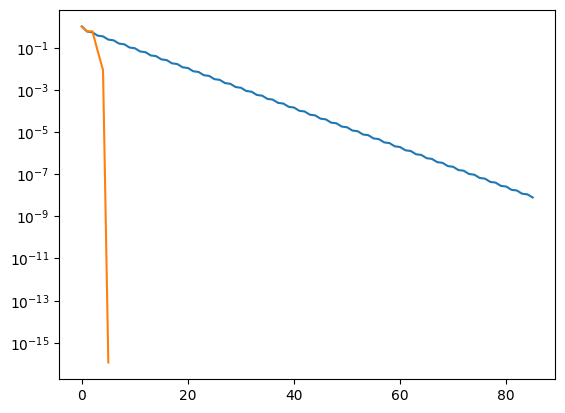

In [17]:
plt.semilogy(np.arange(itG+1),vet_r_gr,np.arange(itCG+1),vet_r_cg)
print("Condizionamento di A", np.linalg.cond(A))


## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

In [18]:
from scipy.linalg import hilbert
n=5
A2=hilbert(5)
b2=np.sum(A2,axis=1).reshape(n,1)
x2_0=np.zeros_like(b2)
itmax=3000
toll=1e-10

In [19]:
x_gr_2,vet_r_gr_2,vec_sol_gr2,itG_2=steepestdescent(A2,b2,x2_0,itmax,toll)
x_CG_2,vet_r_CG_2,vec_sol_CG2,itCG_2=conjugate_gradient(A2,b2,x2_0,itmax,toll)
print("Numero di iterazioni del gradiente  ", itG_2)
print("Numero di iterazioni del gradiente coniugato ", itCG_2)
print("Condizionamento di Hilbert ",np.linalg.cond(A2))

Numero di iterazioni del gradiente   3000
Numero di iterazioni del gradiente coniugato  7
Condizionamento di Hilbert  476607.2502425855


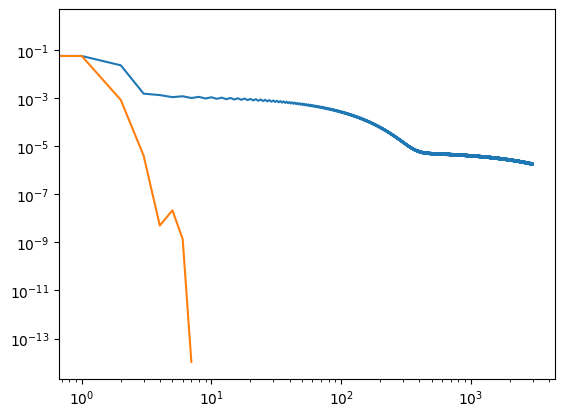

In [20]:
plt.loglog(np.arange(itG_2+1),vet_r_gr_2,np.arange(itCG_2+1),vet_r_CG_2)

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

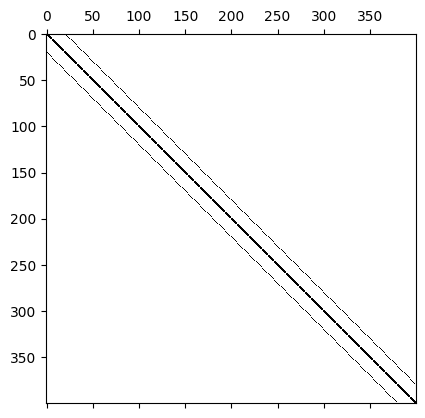

In [21]:
import creaG
n=22  #n=6-->m=16;  n=22-->m=400
G = creaG.numgrid(n)
D = creaG.delsq(G).todense().getA()
plt.spy(D)  #Visualizza la matrice: in bianco i valori nulli, in nero i valori diversi da zero
condD=np.linalg.cond(D)
nD=D.shape[0]
bD=np.sum(D,axis=1).reshape(nD,1)
x0_D=np.zeros_like(bD)
x_gr_D,vet_r_gr_D,vec_sol_gr_D,itG_D=steepestdescent(D,bD,x0_D,itmax,toll)
x_CG_D,vet_r_CG_D,vec_sol_cg_D,itCG_D=conjugate_gradient(D,bD,x0_D,itmax,toll)



In [22]:
x_gr_D,vet_r_gr_D,vec_sol_gr_D,itG_D=steepestdescent(D,bD,x0_D,itmax,toll)
x_CG_D,vet_r_CG_D,vec_sol_gr_CG,itCG_D=conjugate_gradient(D,bD,x0_D,itmax,toll)
print("Numero di iterazioni del gradiente  ", itG_D)
print("Numero di iterazioni del gradiente coniugato ", itCG_D)

Numero di iterazioni del gradiente   1824
Numero di iterazioni del gradiente coniugato  41


Dalla teoria sappiamo che il metodo del gradiente  coniugato è un metodo a convegenza lineare e con fattore di convergenza dato da (K(A))-1)/(K(A))+1), quindi l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo, maggiore è l'indice di condizionamento, più vicono ad 1 ed il fattore di riduzione dell'errore.
Valutiamo (K(A)-1)/(K(A)+1), nel nostro caso

In [23]:
print((np.linalg.cond(D)-1)/(np.linalg.cond(D)+1))

0.9888308262251286


Dalla teoria sappiamo che il metodo del gradiente  coniugato è un metodo a convegenza lineare e con fattore di convergenza dato da (sqrt(K(A))-1)/(sqrt(K(A))+1), quindi l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo, ma meno gravemente rispetto al metodo del gradiente: maggiore è l'indice di condizionamento, più vicono ad 1 ed il fattore di riduzione dell'errore.
Valutiamo (sqrt(K(A))-1)/(sqrt(K(A))+1), nel nostro caso

In [24]:
print((np.sqrt(np.linalg.cond(D))-1)/(np.sqrt(np.linalg.cond(D))+1))

0.8605695850647833


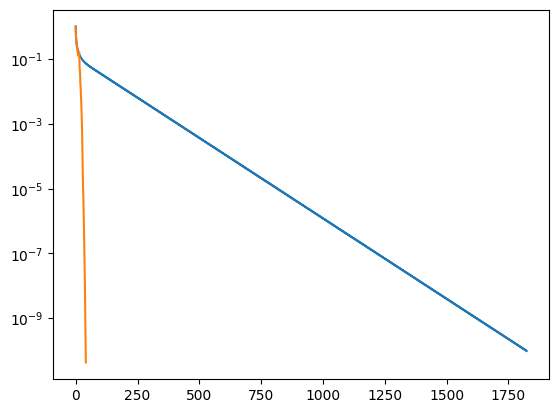

In [25]:
plt.semilogy(np.arange(itG_D+1),vet_r_gr_D,np.arange(itCG_D+1),vet_r_CG_D)